# Scrapping de données appliqué a StackOverflow 

#### Imports de librairies

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from wordcloud import WordCloud

#### accès aux données 

In [2]:
# importer un fichier json 

with open('stackquestions.json') as f:
    questions_data = json.load(f)

#transform to a dataframe
df = pd.DataFrame(questions_data)
df.head()

,title,link,summary,tags,details_author,publication_time
0,What should a student learn who major in compu...,/questions/78786964/what-should-a-student-lear...,\n I've finished learning data ...,"[java, c++, computer-science]",\nuser23975330\n,2024-07-24 07:42:37Z
1,None in Python. How does it work and what does...,/questions/78786961/none-in-python-how-does-it...,\n So I'm currently learning Py...,"[python, loops, nonetype]",\nJujuthecoder\n,2024-07-24 07:41:19Z
2,Looker data studio: sum over running total for...,/questions/78786958/looker-data-studio-sum-ove...,\n I have the following table.\...,"[window-functions, looker-studio]",\nCignitor\n,2024-07-24 07:39:58Z
3,Spring authorization server : Invalid Credenti...,/questions/78786956/spring-authorization-serve...,\n i try to test my access and ...,"[spring-security, openid, spring-security-oaut...",\nmeysamgh\n,2024-07-24 07:39:43Z
4,React query - force querying new data for a ne...,/questions/78786955/react-query-force-querying...,\n I'm using react query to fet...,"[reactjs, react-query]",\nOfir\n,2024-07-24 07:39:36Z


In [3]:
df.info()
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             8800 non-null   object
 1   link              8800 non-null   object
 2   summary           8800 non-null   object
 3   tags              8800 non-null   object
 4   details_author    8800 non-null   object
 5   publication_time  8800 non-null   object
dtypes: object(6)
memory usage: 412.6+ KB
Index(['title', 'link', 'summary', 'tags', 'details_author',
       'publication_time'],
      dtype='object')


### Analyse de données 

Colonnes disponibles dans le DataFrame :
Index(['title', 'link', 'summary', 'tags', 'details_author',
       'publication_time', 'title_length', 'summary_length', 'day', 'hour'],
      dtype='object')


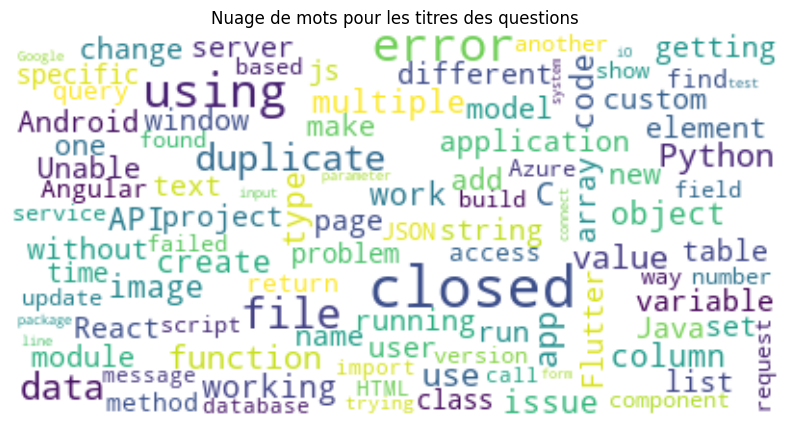

In [18]:

# Nettoyer les noms de colonnes

# Vérifier les colonnes disponibles
print("Colonnes disponibles dans le DataFrame :")
print(df.columns)

# Nuage de mots pour les titres
text = " ".join(title for title in df.title)
wordcloud = WordCloud(max_font_size=30, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Nuage de mots pour les titres des questions')
plt.show()



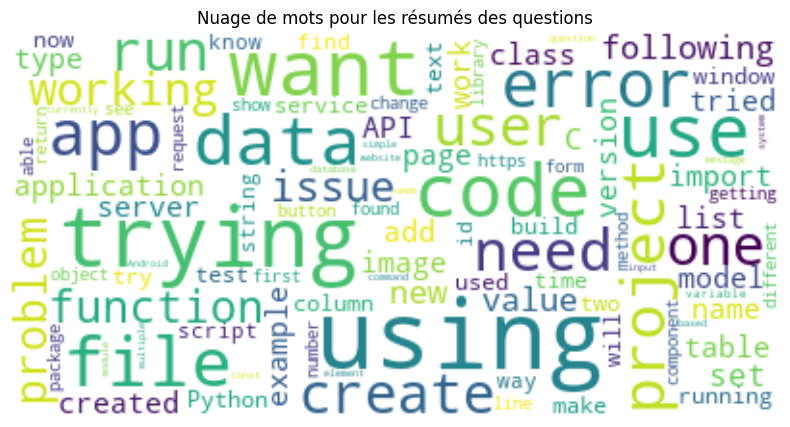

In [12]:
 #Nuage de mots pour les résumés
text_summaries = " ".join(summary for summary in df.summary)
wordcloud_summaries = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_summaries)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_summaries, interpolation="bilinear")
plt.axis("off")
plt.title('Nuage de mots pour les résumés des questions')
plt.show()



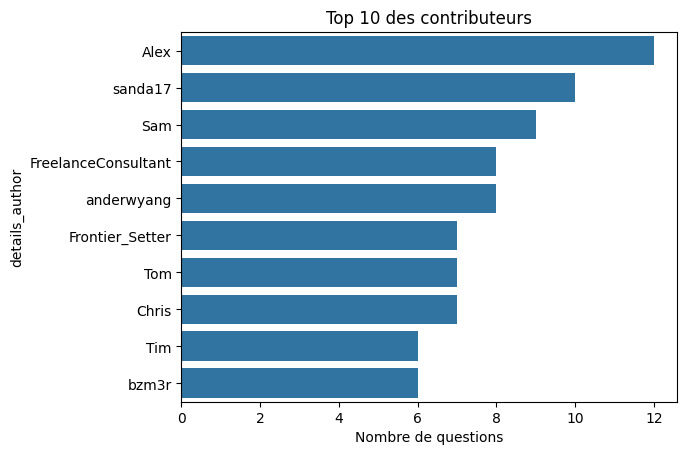

In [13]:
# Top contributeurs
top_authors = df['details_author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 des contributeurs')
plt.xlabel('Nombre de questions')
plt.show()


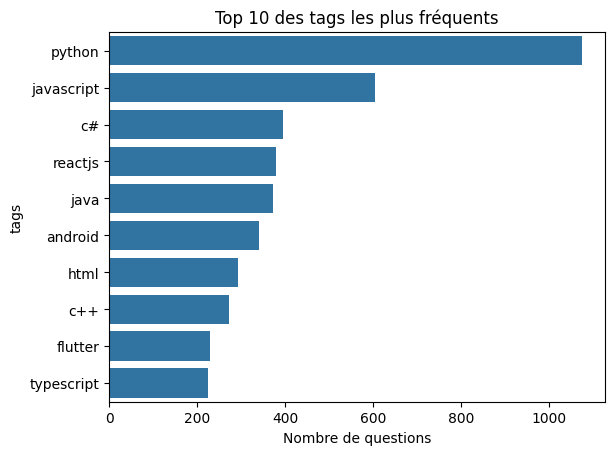

In [7]:
# Tags les plus fréquents
all_tags = df['tags'].explode()
top_tags = all_tags.value_counts().head(10)
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title('Top 10 des tags les plus fréquents')
plt.xlabel('Nombre de questions')
plt.show()


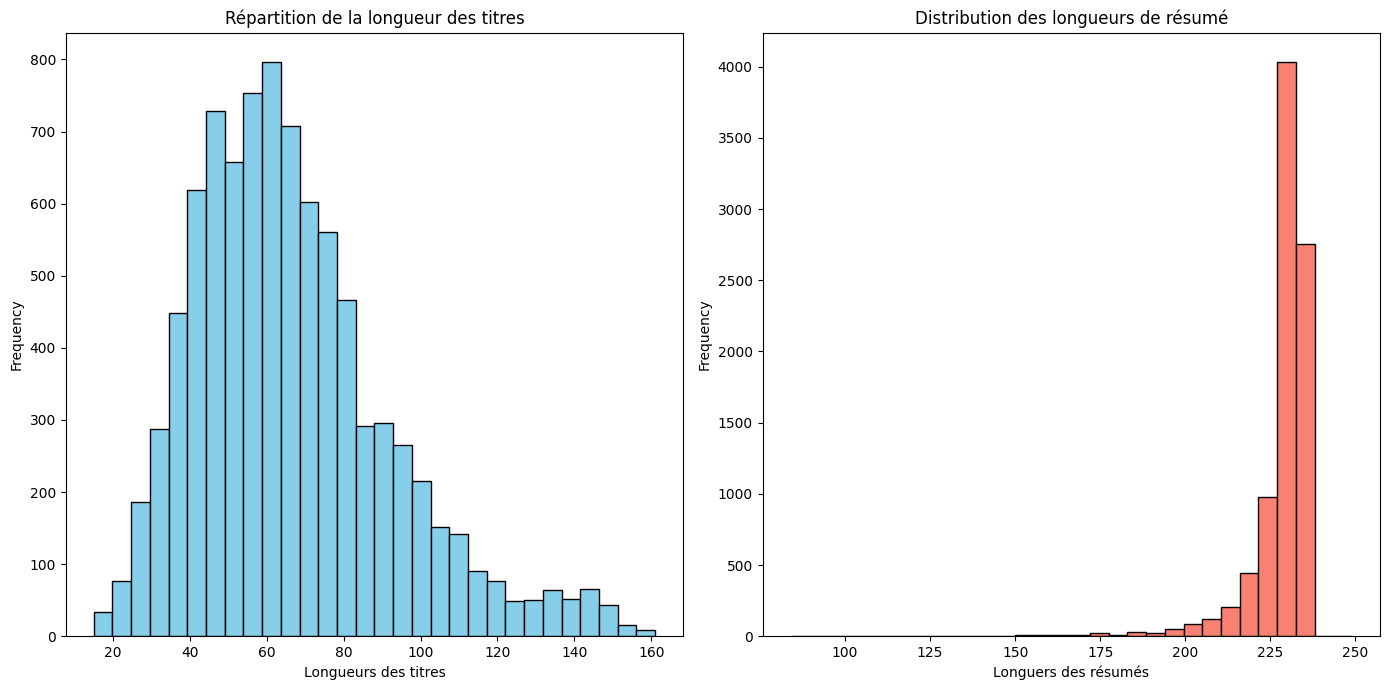

In [19]:
df['title_length'] = df['title'].apply(len)
df['summary_length'] = df['summary'].apply(len)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
df['title_length'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Répartition de la longueur des titres')
plt.xlabel('Longueurs des titres')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['summary_length'].plot(kind='hist', bins=30, color='salmon', edgecolor='black')
plt.title('Distribution des longueurs de résumé')
plt.xlabel('Longuers des résumés')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

